# Analysis 5
## Objectives
- for yelp users find relation between their numbers of reviews given and average stars
- try to find weighted average rank of businesses in AZ
- further speculate habit of users writting reviews to business
## Steps
- use user.json in data set
- get review count and average stars for each user
- generate dataframe to record data
- calculate weighted average rank of businesses in AZ
- generate plots to analyze relation between their numbers of reviews given and average stars

In [49]:
%matplotlib inline

In [50]:
import glob
import os
import json
from pathlib import Path
from pandas import Series, DataFrame
import pandas as pd

In [51]:
p = Path(os.getcwd())
user_path = str(p.parent) + '/data/yelp_training_set/yelp_training_set_user.json'

In [52]:
df = pd.DataFrame(columns=['review', 'stars'])
with open(user_path, 'r', encoding='utf-8', errors='ignore') as f:
    for line in f:
        data = json.loads(line)
        review = data['review_count']
        stars = data['average_stars']
        df = df.append(Series({'review': review, 'stars': stars}), ignore_index=True)
df.head(5)

,review,stars
0,6.0,5.0
1,2.0,1.0
2,2.0,5.0
3,2.0,5.0
4,1.0,1.0


In [53]:
df['weight'] = df['review'] * df['stars']
total_reviews = df['review'].sum()
total_reviews

1704849.0

In [54]:
weighted_average = df['weight'].sum() / total_reviews
print(weighted_average)

3.724406519287021


In [55]:
df.head(5)

,review,stars,weight
0,6.0,5.0,30.0
1,2.0,1.0,2.0
2,2.0,5.0,10.0
3,2.0,5.0,10.0
4,1.0,1.0,1.0


In [56]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

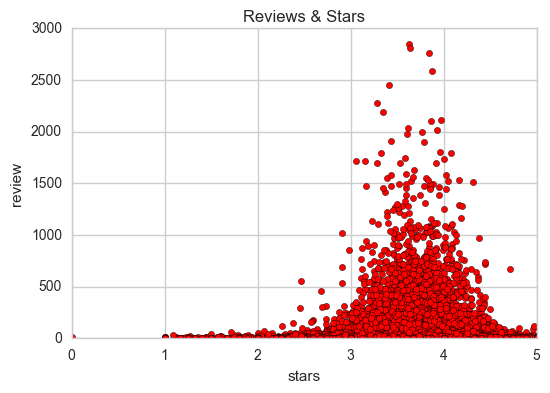

In [57]:
matplotlib.style.use('seaborn-whitegrid')
df.plot(x='stars', y='review', kind = 'scatter', xlim = [0, 5], ylim = [0, 3000], color='Red', title = 'Reviews & Stars')
plt.savefig('ana_5/reviews_and_average_stars.png')

In [58]:
li = range(6)
filter_values = li[0::1]
out = pd.cut(df['stars'], bins = filter_values)
counts = pd.value_counts(out)
counts

(3, 4]    19640
(4, 5]    16103
(2, 3]     4681
(0, 1]     2008
(1, 2]     1440
Name: stars, dtype: int64

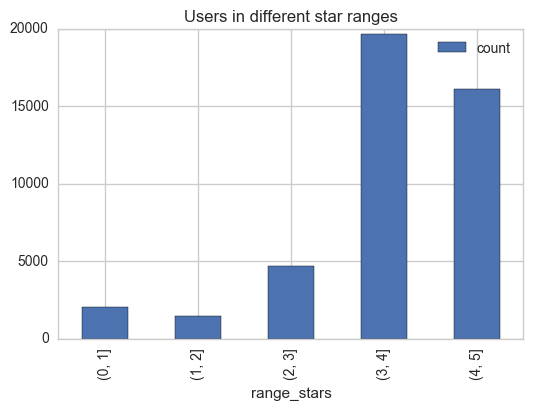

In [59]:
cut_df = counts.to_frame().reset_index()
cut_df.columns = ['range_stars', 'count']
cut_df['stars'] = cut_df['range_stars'].apply(lambda x: x.split(', ')[1][:-1])
cut_df = cut_df.sort_values(by = 'stars')
cut_df = cut_df[['range_stars', 'count']]
cut_df.plot(x='range_stars', y='count', kind = 'bar', ylim = [0, 20000], title = 'Users in different star ranges')
plt.savefig('ana_5/users_in_star_range.png')

In [60]:
filter_values = [0, 10, 100, 500, 1000, 3000]
out_review = pd.cut(df['review'], bins = filter_values)
counts_review = pd.value_counts(out_review)
counts_review

(0, 10]         26702
(10, 100]       13128
(100, 500]       3533
(500, 1000]       397
(1000, 3000]      112
Name: review, dtype: int64

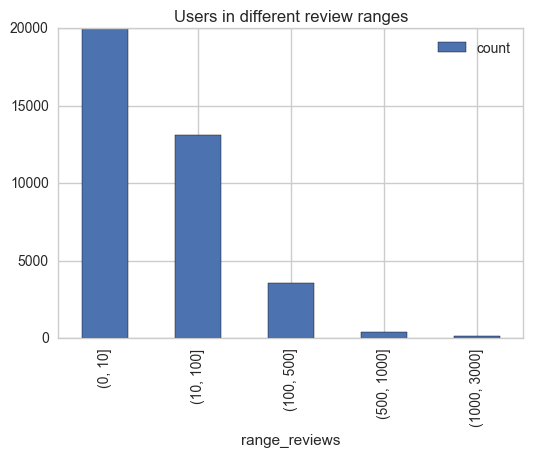

In [61]:
cut_df = counts_review.to_frame().reset_index()
cut_df.columns = ['range_reviews', 'count']
cut_df['tmp'] = cut_df['range_reviews'].apply(lambda x: x.split(', ')[1][:-1])
cut_df = cut_df.sort_values(by = 'tmp')
cut_df = cut_df[['range_reviews', 'count']]
cut_df.plot(x='range_reviews', y='count', kind = 'bar', ylim = [0, 20000], title = 'Users in different review ranges')
plt.savefig('ana_5/users_in_review_range.png')

In [62]:
filter_values = [0, 3, 10, 100, 500, 1000, 3000]
new_df = df.groupby(pd.cut(df['review'], bins = filter_values)).mean()
new_df = new_df[['stars']].reset_index()
new_df

,review,stars
0,"(0, 3]",3.697692
1,"(3, 10]",3.788688
2,"(10, 100]",3.766194
3,"(100, 500]",3.715964
4,"(500, 1000]",3.718489
5,"(1000, 3000]",3.697054


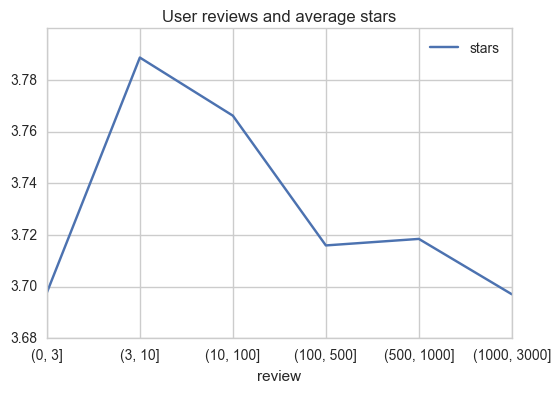

In [63]:
new_df.plot(x='review', y='stars', kind = 'line', ylim = [3.68, 3.8], title = 'User reviews and average stars')
plt.savefig('ana_5/users_stars_and_reviews.png')